# IMDB Movie Genre Data Analysis

This analysis explores movie genres using IMDB data, highlighting profitability, popularity, and ratings.

In [83]:
# Import pandas library
import pandas as pd

# Load the imdb movies dataset
movies = pd.read_csv(r'C:\Users\User\Downloads\imdb_movies.csv')

In [84]:
# Set pandas display options for better visibility of data
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)

In [85]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [86]:
# Remove duplicate rows from the dataset to ensure data quality
movies.drop_duplicates(inplace=True)

In [89]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [90]:
# Drop rows where the genre information is missing to maintain accurate genre analysis
movies.dropna(subset=['genres'], inplace=True)

In [93]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [96]:
# Calculate the profit by subtracting budget from revenue
movies['profit'] = movies['revenue'] - movies['budget']

In [99]:
# Select specific columns relevant to the genre analysis
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'release_year', 'genres', 'runtime', 'release_date', 'vote_count', 'vote_average', 'profit']]

In [101]:
movies_genre.head()

,popularity,budget,revenue,original_title,release_year,genres,runtime,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,124,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,2015,Action|Adventure|Science Fiction|Thriller,120,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,2015,Adventure|Science Fiction|Thriller,119,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,2015,Action|Adventure|Science Fiction|Fantasy,136,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,2015,Action|Crime|Thriller,137,4/1/15,2947,7.3,1316249360


In [103]:
from pandas import Series, DataFrame

In [105]:
split = movies_genre['genres'].str.split("|").apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\User\AppData\Local\Temp\ipykernel_34448\3027013115.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split("|").apply(Series,1).stack()


In [106]:
movies_genre.head()

,popularity,budget,revenue,original_title,release_year,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,2015,120,5/13/15,6185,7.1,228436354,Action


## Questions (Q):

#### 1. Which genres are the most common (number of movies made)?

In [108]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title',ascending = False)

<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

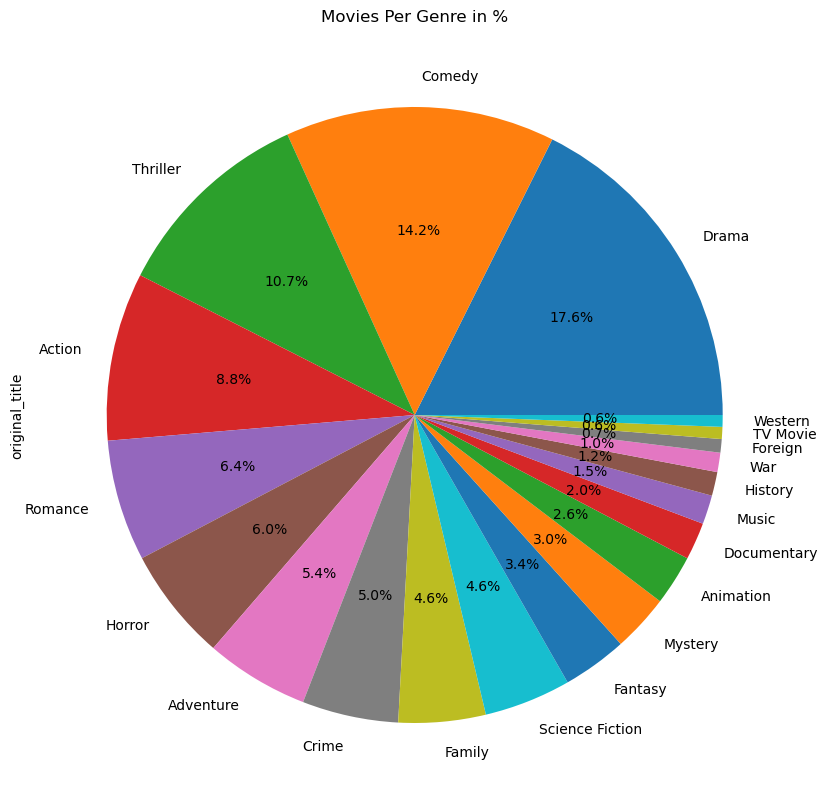

In [109]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct ='%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'movies per genre'}, ylabel='genres_split'>

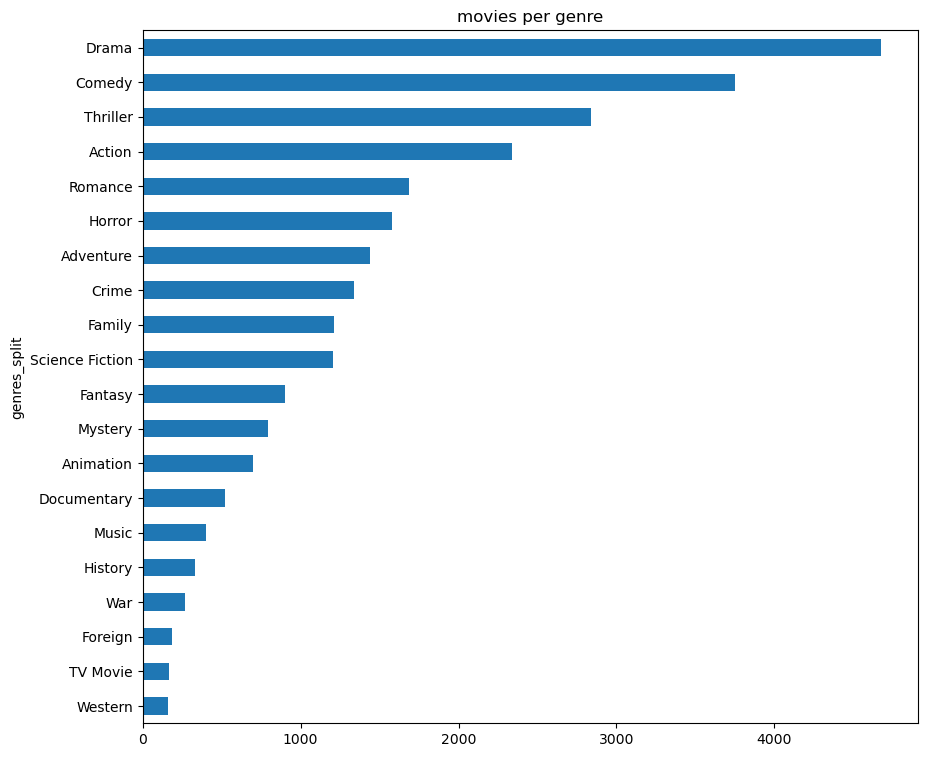

In [110]:
genres_count['original_title'].sort_values(ascending= True).plot.barh(title = 'movies per genre', figsize = (10,9))

#### 2. Which genres have high avg. budget and reveue?

In [112]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)
pd.options.display.float_format = '{:2f}'.format
genres_avg

,popularity,budget,revenue,release_year,runtime,vote_count,vote_average,profit
genres_split,,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,2000.056208,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,1999.388851,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,2003.995708,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,2000.816240,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,1999.491137,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,2008.313462,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,2000.929202,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,2000.774167,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,2000.292576,100.736900,420.741266,5.863537,63701071.733624


In [113]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

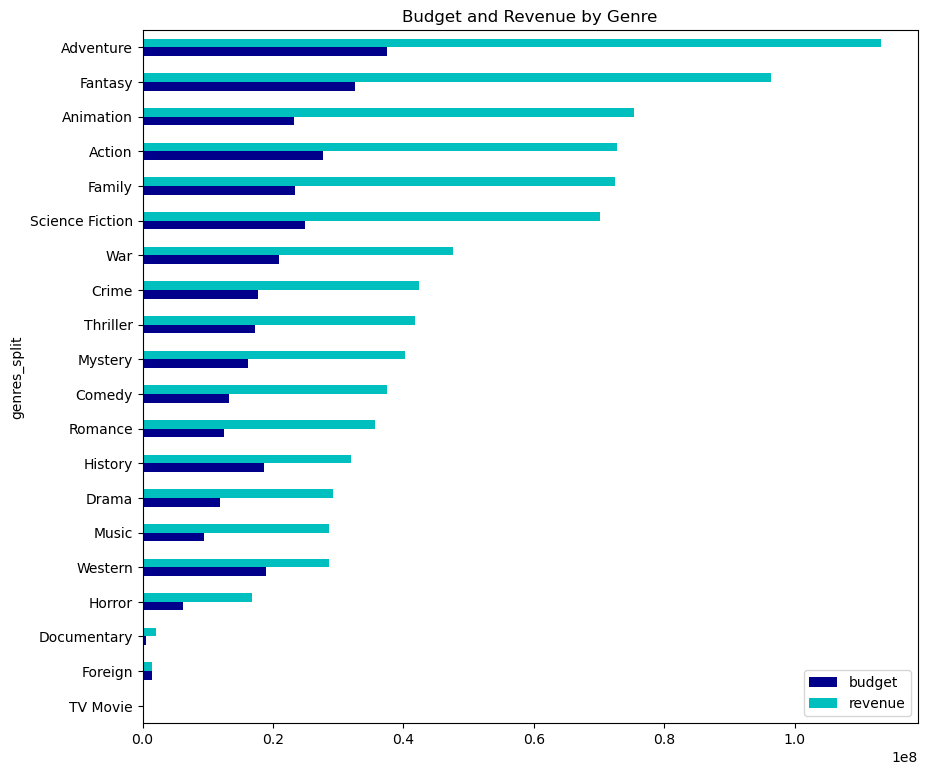

In [114]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue', 'c'), figsize = (10,9))

#### 3. Which genres have highest avg. profit?


<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

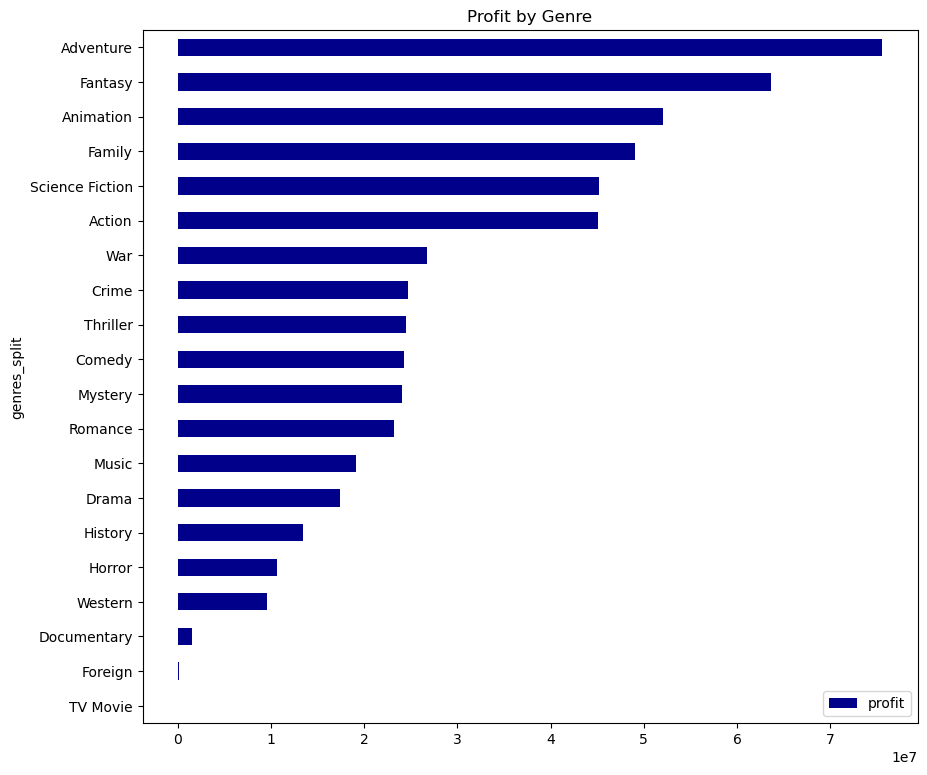

In [116]:
genres_avg.sort_values('profit', ascending = True, inplace = True)
genres_avg[['profit']].plot.barh(title = 'Profit by Genre', color = ('DarkBlue', ), figsize = (10,9))

#### 4. Which genres have a high average popularity?


<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

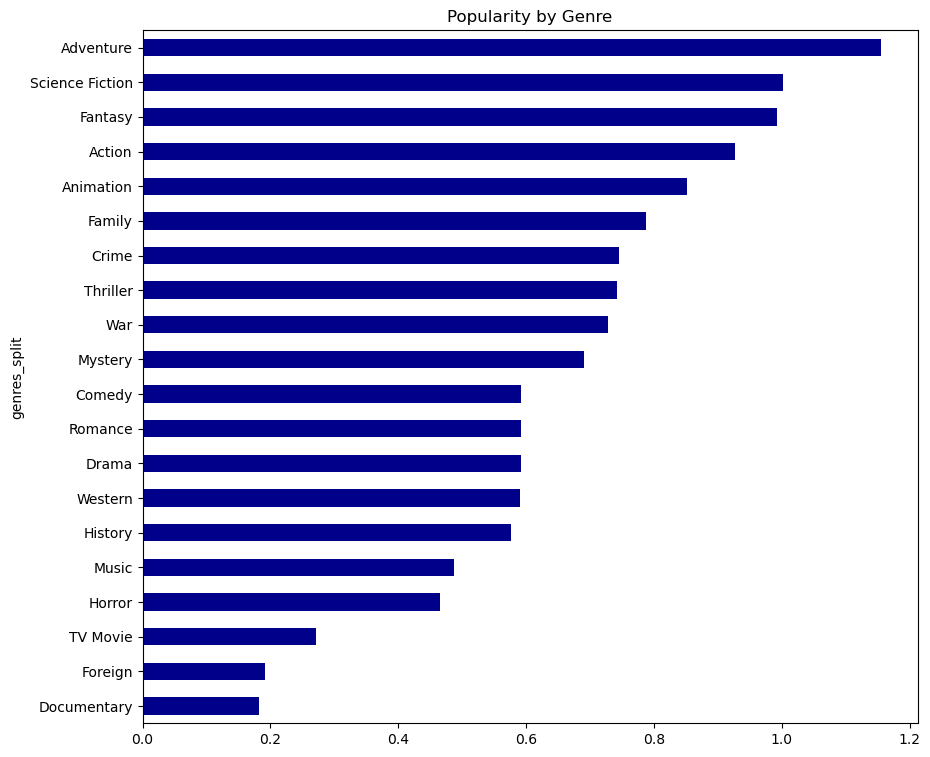

In [118]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)
genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', color ='DarkBlue', figsize = (10,9))

In [126]:
# 4. which genres have highest number of movies with an voting avg. >=8?

In [130]:
movies_genre.head()

,popularity,budget,revenue,original_title,release_year,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,2015,120,5/13/15,6185,7.100000,228436354,Action


In [133]:
movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)].head()

,popularity,budget,revenue,original_title,release_year,runtime,release_date,vote_count,vote_average,profit,genres_split
9,6.326804,175000000,853708609,Inside Out,2015,94,6/9/15,3935,8.000000,678708609,Comedy
9,6.326804,175000000,853708609,Inside Out,2015,94,6/9/15,3935,8.000000,678708609,Animation
9,6.326804,175000000,853708609,Inside Out,2015,94,6/9/15,3935,8.000000,678708609,Family
35,3.557846,6000000,35401758,Room,2015,117,10/16/15,1520,8.000000,29401758,Drama
35,3.557846,6000000,35401758,Room,2015,117,10/16/15,1520,8.000000,29401758,Thriller


In [135]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[(movies_genre['vote_average'] >= 8)]

In [137]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average',ascending = True)

In [139]:
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

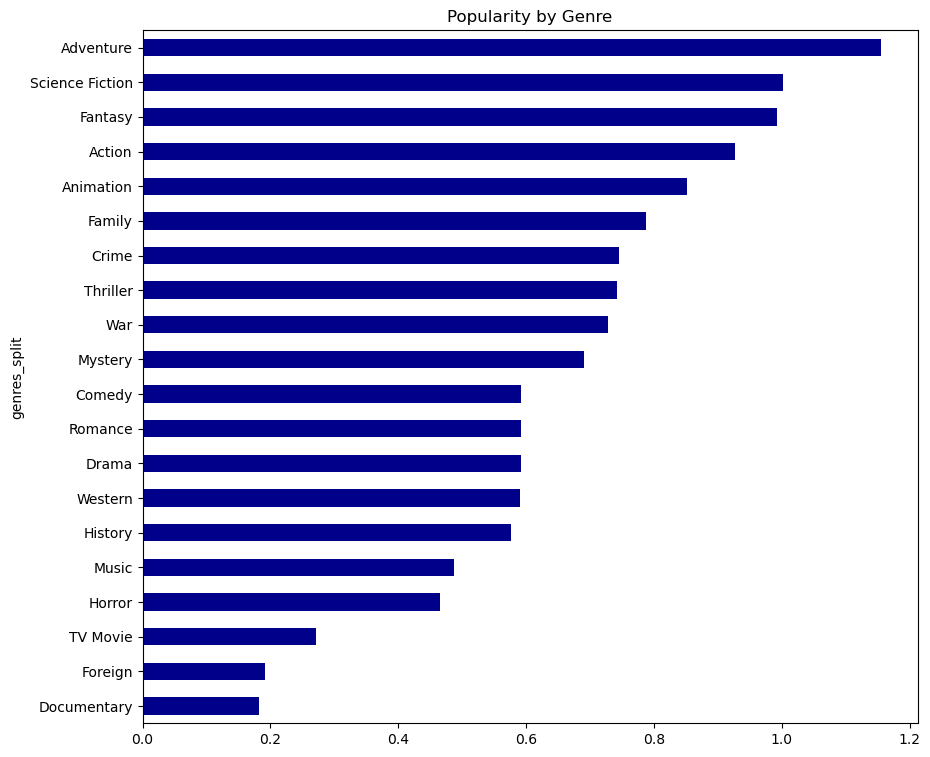

In [141]:
genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', color ='DarkBlue', figsize = (10,9))

In [143]:
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average',ascending = True)

<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

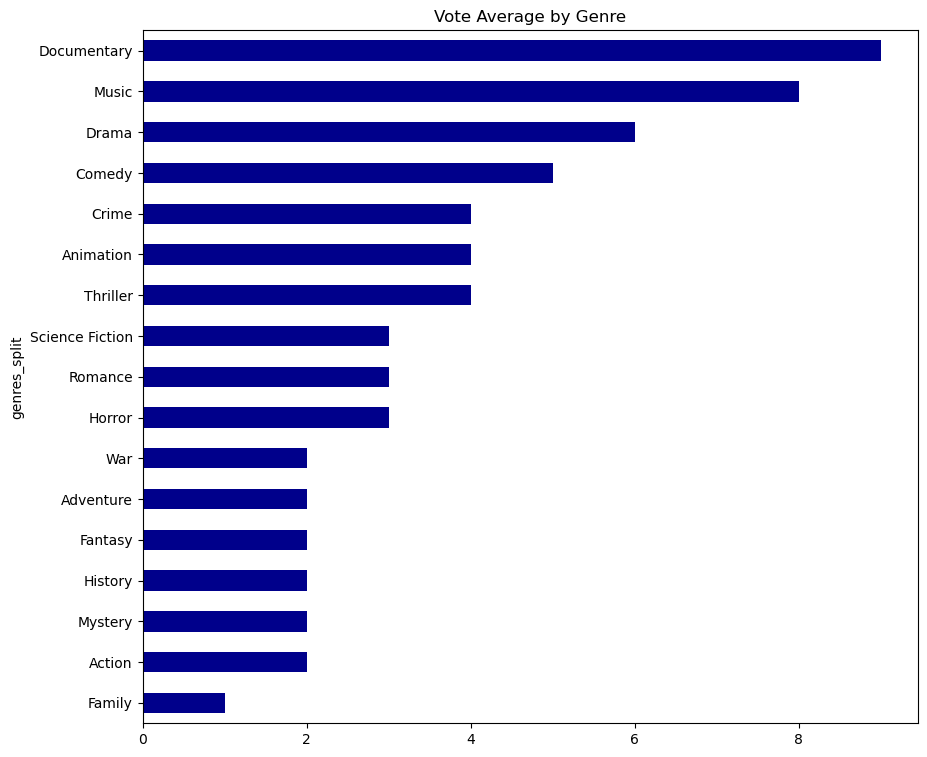

In [145]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', color ='DarkBlue', figsize = (10,9))

## Research Hypothesis

#### 1. The best movies according to vote average return high profit and revenue.

In [148]:
# Remove duplicate rows from the dataset to ensure data quality
movies.drop_duplicates(inplace=True)

In [150]:
movies_counted = movies_genre[(movies_genre['vote_count'] >= 50)]
movies_counted.corr(method = 'spearman', numeric_only = True)

,popularity,budget,revenue,release_year,runtime,vote_count,vote_average,profit
popularity,1.000000,0.496554,0.606165,0.091893,0.231128,0.776718,0.213364,0.516448
budget,0.496554,1.000000,0.723696,0.024279,0.355018,0.573096,-0.036132,0.343588
revenue,0.606165,0.723696,1.000000,-0.075445,0.346976,0.699428,0.126505,0.841594
release_year,0.091893,0.024279,-0.075445,1.000000,-0.136733,0.176190,-0.134809,-0.075017
runtime,0.231128,0.355018,0.346976,-0.136733,1.000000,0.269755,0.260482,0.223173
vote_count,0.776718,0.573096,0.699428,0.176190,0.269755,1.000000,0.307466,0.598132
vote_average,0.213364,-0.036132,0.126505,-0.134809,0.260482,0.307466,1.000000,0.217354
profit,0.516448,0.343588,0.841594,-0.075017,0.223173,0.598132,0.217354,1.000000


<Axes: xlabel='vote_average', ylabel='revenue'>

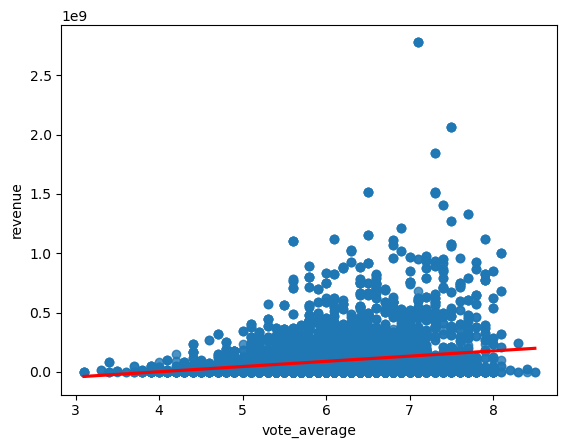

In [152]:
import seaborn as sns
sns.regplot(x='vote_average', y='revenue', data = movies_counted, line_kws = {"color":'red'})

<Axes: xlabel='vote_average', ylabel='profit'>

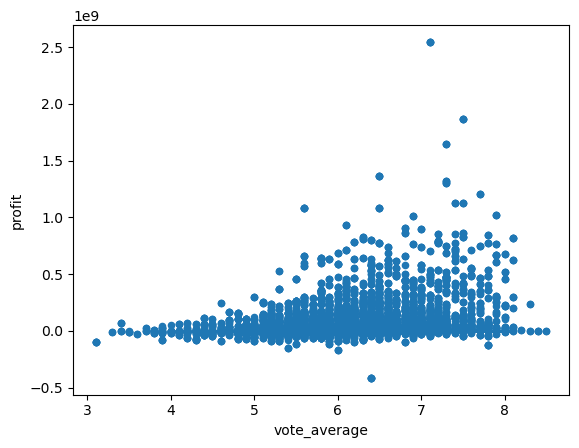

In [153]:
movies_counted.plot.scatter(x = 'vote_average', y='profit')

#### 2. The best movies according to popularity return high profit and revenue.


In [263]:
movies_counted.corr(method = 'spearman', numeric_only = True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


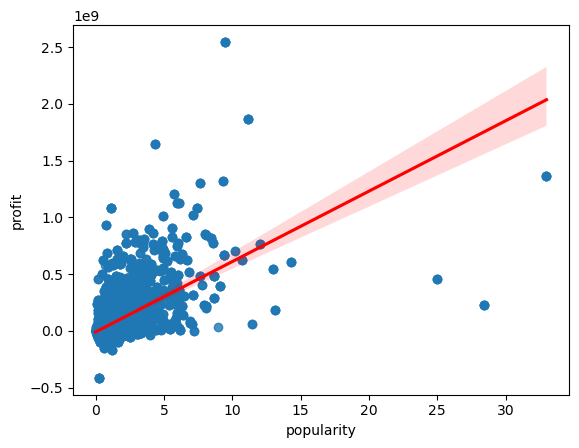

In [156]:
import matplotlib.pyplot as plt
sns.regplot(x='popularity', y='profit', data = movies_counted, line_kws = {"color":'red'})
plt.show()

In [ ]:
3. Highly budgeted movies return high revenue and profit.

In [287]:
movies_counted.head()

,popularity,budget,revenue,original_title,genres,runtime,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,124,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,120,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,119,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,136,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,137,4/1/15,2947,7.300000,1316249360


<Axes: xlabel='budget', ylabel='revenue'>

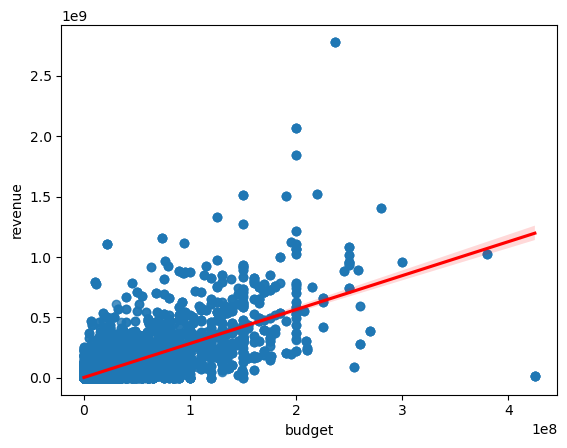

In [158]:
sns.regplot(x='budget', y='revenue', data = movies_counted, line_kws = {"color":'red'})

#### 4. High-budget movies have a high popularity.


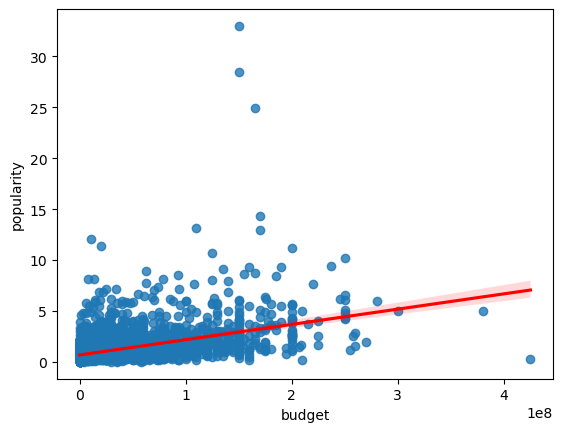

<Figure size 1000x500 with 0 Axes>

In [304]:
sns.regplot(x='budget', y='popularity', data = movies_counted, line_kws = {"color":'red'})
plt.figure(figsize =(10,5))
plt.show()

#### 5. Look at profit per genre per year

In [322]:
movies_genre.head()

,popularity,budget,revenue,original_title,release_year,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,2015,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,2015,120,5/13/15,6185,7.100000,228436354,Action


In [330]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year','genres_split'])['profit'].mean())

In [338]:
final_genre = pd.pivot_table(time_genre, values ='profit', index = ['genres_split'], columns = ['release_year'] )

Text(0.5, 1.0, 'Genres by Profit per Year')

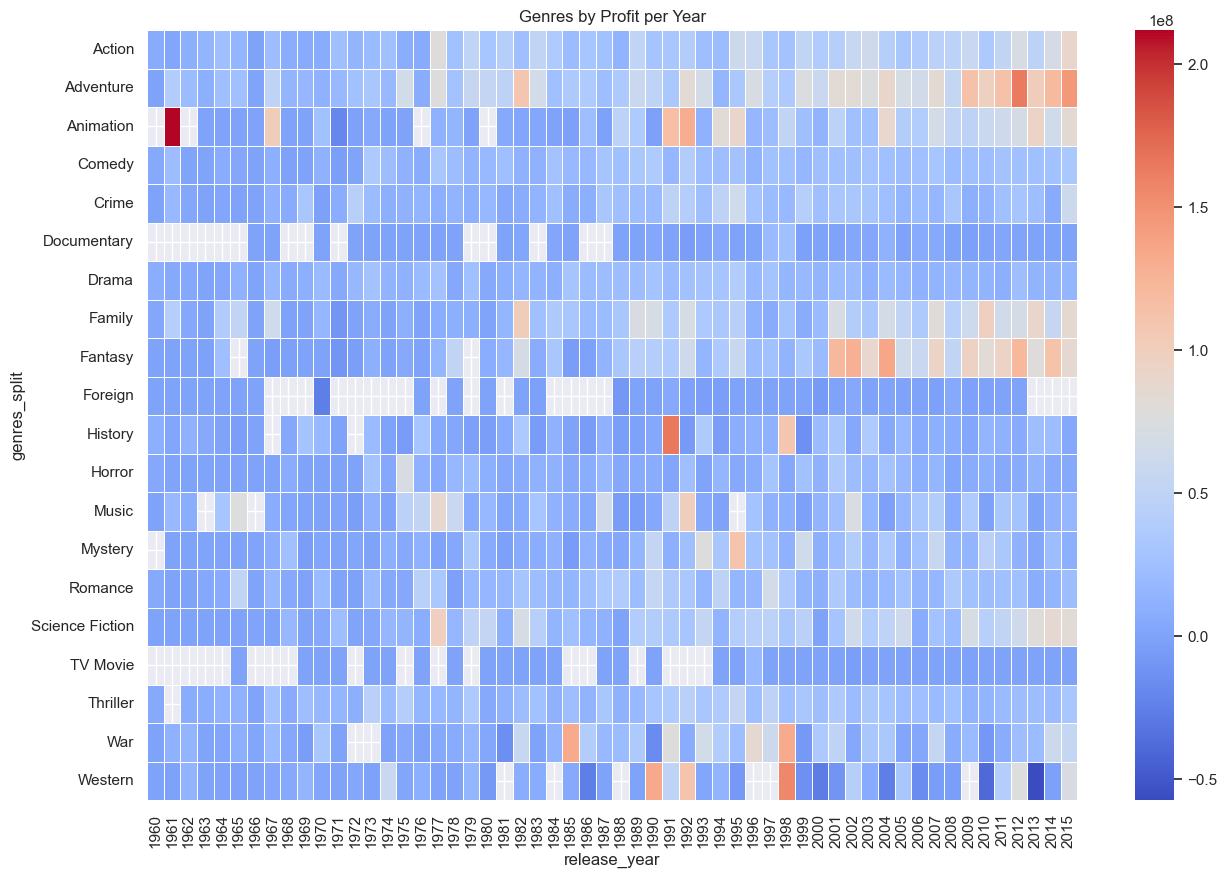

In [342]:
sns.set(rc ={'figure.figsize':(15,10)})


sns.heatmap(final_genre, cmap = 'coolwarm', linewidth =.5)
plt.title('Genres by Profit per Year')